In [21]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

#LOAD IMAGE

In [33]:
def read_img(filename):
    img = cv2.imread(filename)
    cv2_imshow(img)
    return img

upload image file

Saving red flower.jpg to red flower.jpg


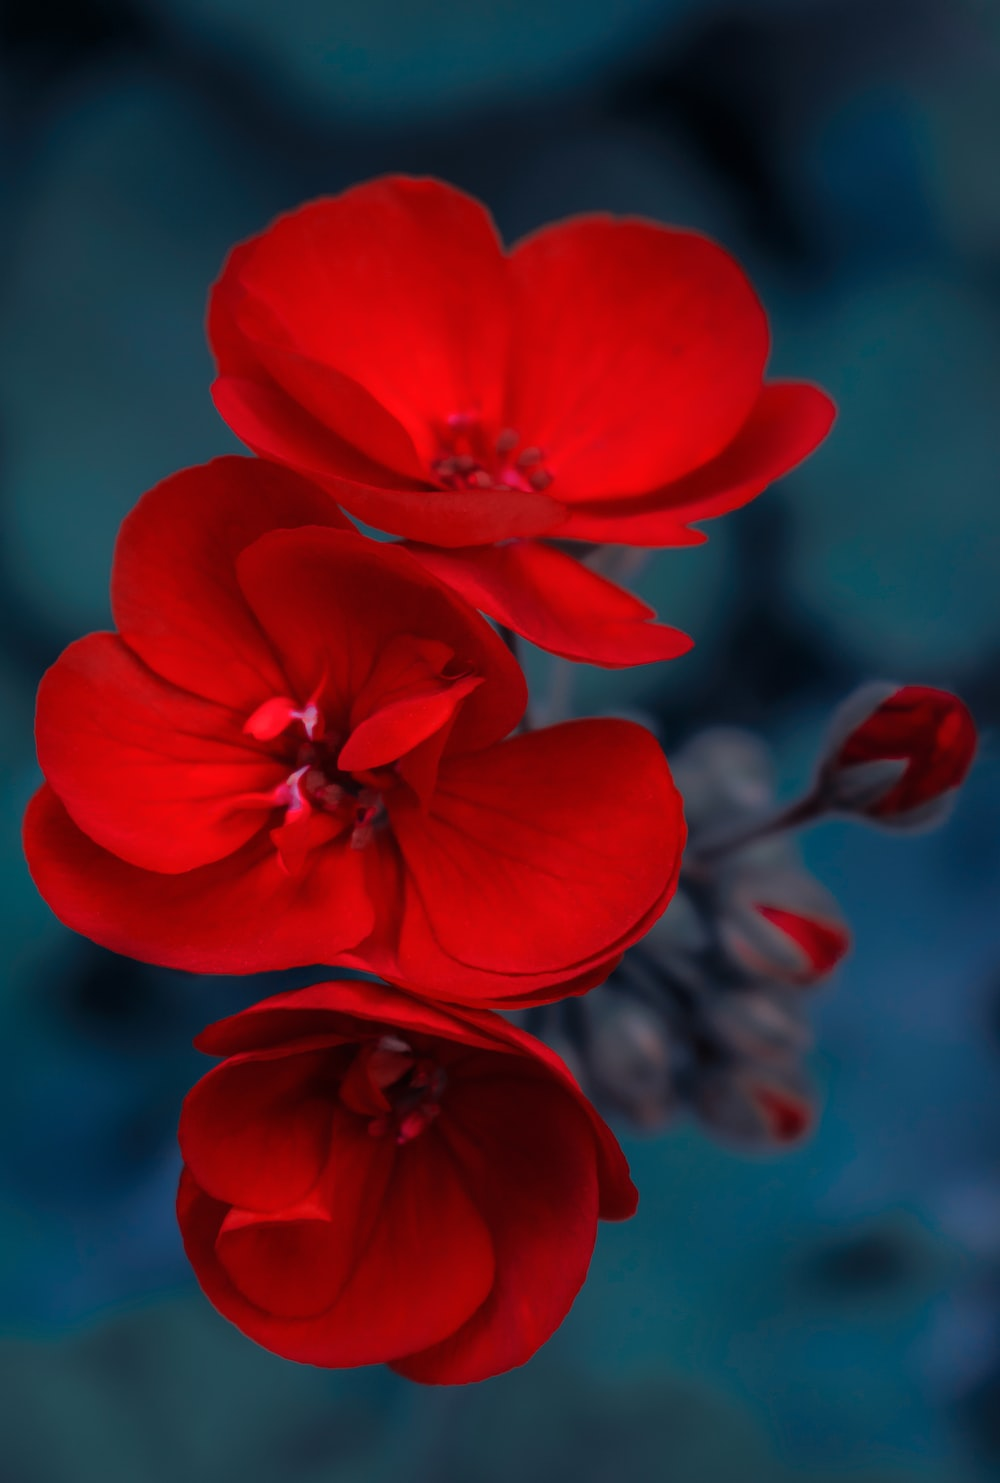

In [35]:
uploaded = files.upload()
filename = next(iter(uploaded))
img = read_img(filename)

In [36]:
def edge_detection(img,line_wdt,blur):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayBlur = cv2.medianBlur(gray,blur)
    edges = cv2.adaptiveThreshold(grayBlur, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,line_wdt,blur)
    return edges

In [41]:
line_wdt = 3
blur_value = 5
edgeImg = edge_detection(img,line_wdt,blur_value)


In [42]:
def color_quantisation(img, k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret, label, center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result


In [43]:

totalcolors = 7
img = color_quantisation(img,totalcolors)



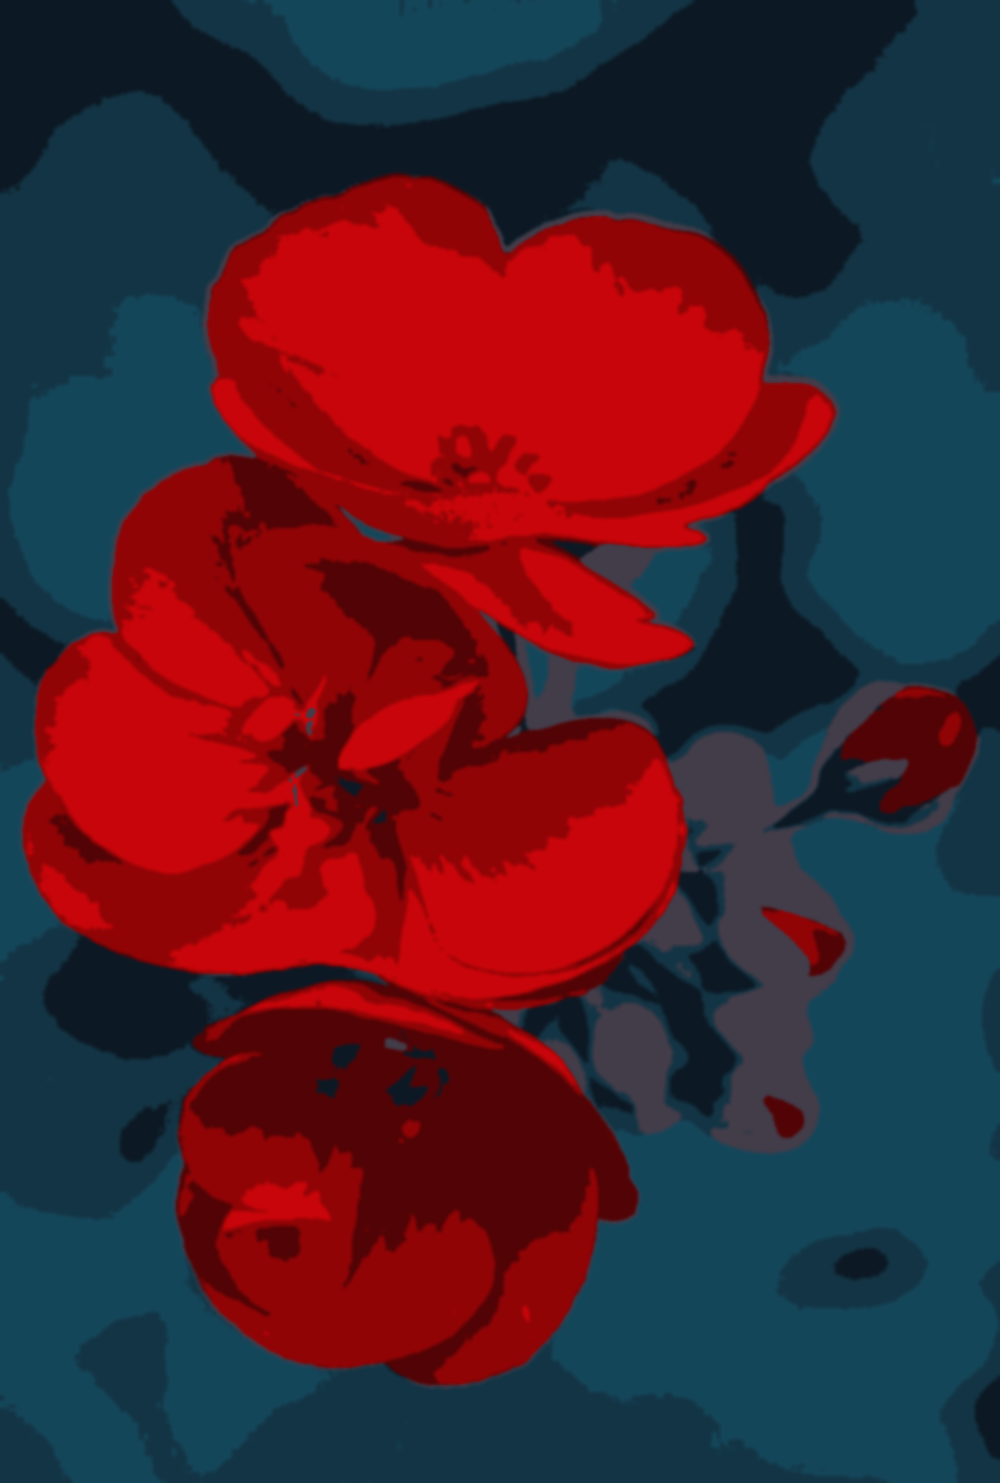

In [48]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

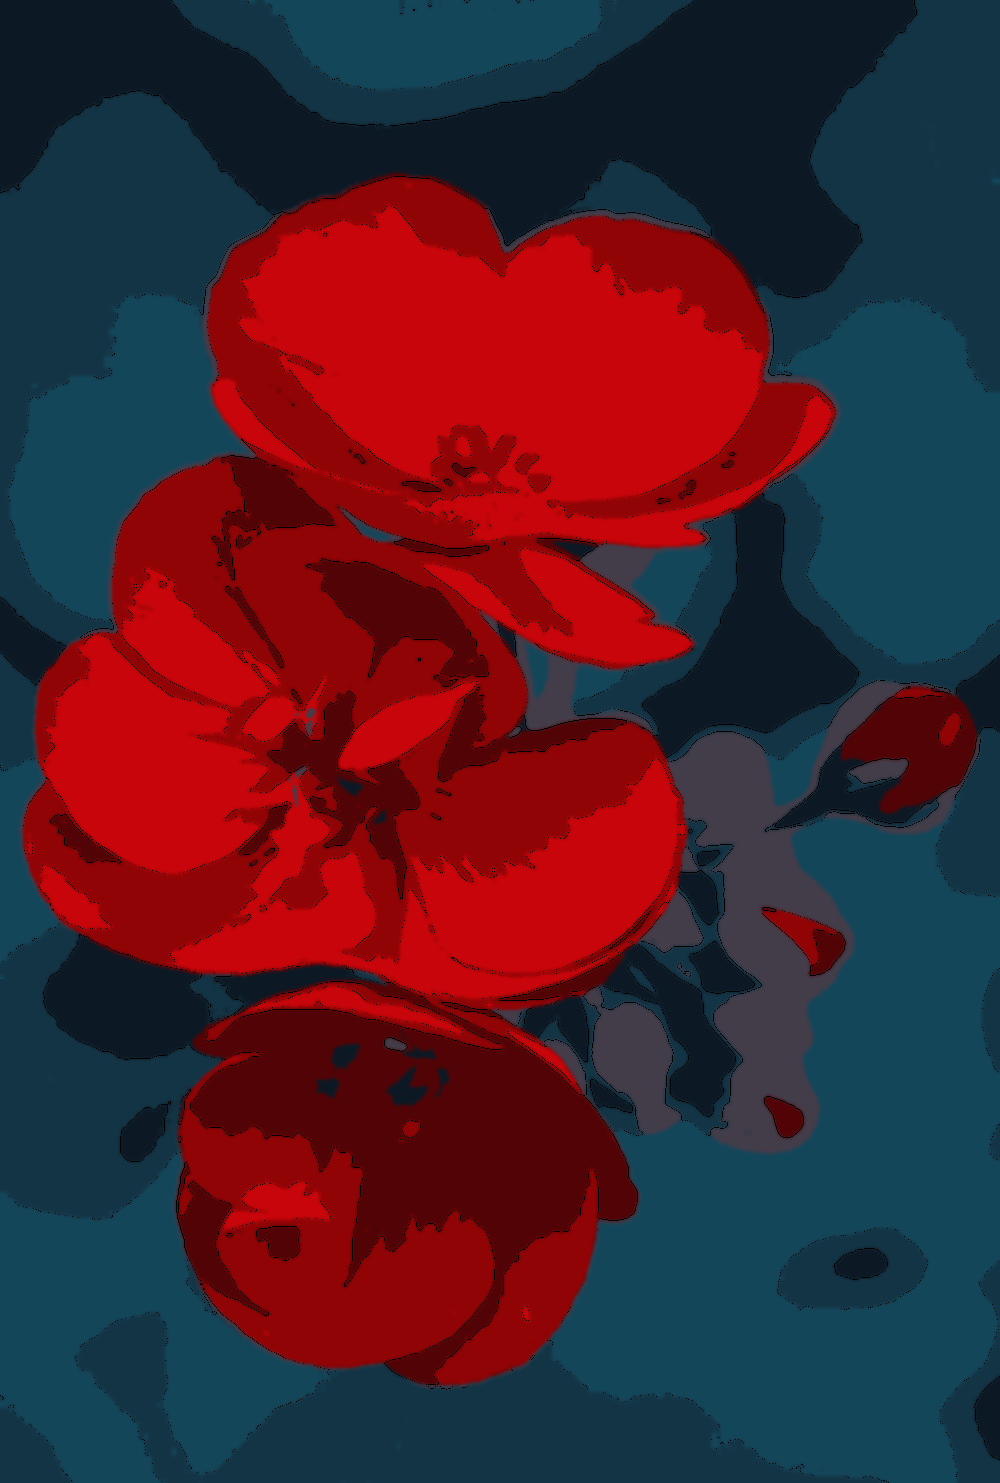

In [49]:

cartoon = cv2.bitwise_and(blurred,blurred,mask=edgeImg)
cv2_imshow(cartoon)
